<a href="https://colab.research.google.com/github/Uriel1024/Machine-learning/blob/main/practica_4/Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importamos las libreriass y los dataset(al menos los que esten disponibles en sklearn)
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris, load_diabetes, load_wine
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


obtenemos la info de cada dataset

In [18]:
#iris
iris = load_iris()
X_iris ,y_iris = iris.data, iris.target

# Boston Housing
url_boston = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url_boston)
X_boston = boston.drop(columns=["medv"])
y_boston = boston["medv"]

#diabetes
diabetes = load_diabetes()
X_diabetes , y_diabetes = diabetes.data, diabetes.target

#wine
wine = load_wine()
X_wine, y_wine = wine.data , wine.target

#car price
df_car = pd.read_csv('/content/Car_Price_Prediction.csv')
categorical_cols = df_car.select_dtypes(include=['object']).columns
df_car_encoded = pd.get_dummies(df_car, columns=categorical_cols, drop_first=True)
X_car = df_car_encoded.drop(columns=["Price"])
y_car = df_car_encoded["Price"]

#concrete data
df_concrete = pd.read_csv('/content/concrete_data.csv')
X_concrete = df_concrete.drop(columns=["Strength"])
y_concrete = df_concrete["Strength"]

Dividimos el data set en 80-20 para entrenar y evaluar el modelo

In [19]:

X_train_iris , X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris,y_iris,test_size=.2,random_state=42)
X_train_boston , X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston,y_boston,test_size=.2,random_state=42)
X_train_diabetes , X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes,y_diabetes,test_size=.2,random_state=42)
X_train_wine , X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine,y_wine,test_size=.2,random_state=42)
X_train_car , X_test_car, y_train_car, y_test_car = train_test_split(X_car,y_car,test_size=.2,random_state=42)
X_train_concrete , X_test_concrete, y_train_concrete, y_test_concrete = train_test_split(X_concrete,y_concrete,test_size=.2,random_state=42)

Entrenamiento de los modelos

In [20]:
#inicializamos el modelo
 # Import r2_score

def modelos_supervisados(X_train, X_test,y_train,y_test,data_info):
  modelos = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "LinearRegression": LinearRegression(),
    "MLPRegressor": MLPRegressor(max_iter=1000,random_state=42)
  }

  rest = {"Modelo": [], "mse": [], "R2": []}

  for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    rest["Modelo"].append(nombre)
    rest["mse"].append(mse)
    rest["R2"].append(r2)

  resultados_df = pd.DataFrame(rest)

  #print(f"Resultados del dataset {data_info}")
  #display(resultados_df)
  plt.style.use('seaborn-v0_8-whitegrid')
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))
  axes[0].bar(resultados_df['Modelo'], resultados_df['mse'], color='skyblue')
  axes[0].set_title(f'Error Cuadrático Medio (MSE) para el dataset {data_info}')
  axes[0].set_ylabel('MSE')
  axes[0].tick_params(axis='x', rotation=45)

  axes[1].bar(resultados_df['Modelo'], resultados_df['R2'], color='salmon')
  axes[1].set_title(f'Coeficiente de Determinación (R²) para el dataset {data_info}')
  axes[1].set_ylabel('R² Score')
  axes[1].tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.show()



Funcion main para ejecutar todo alv

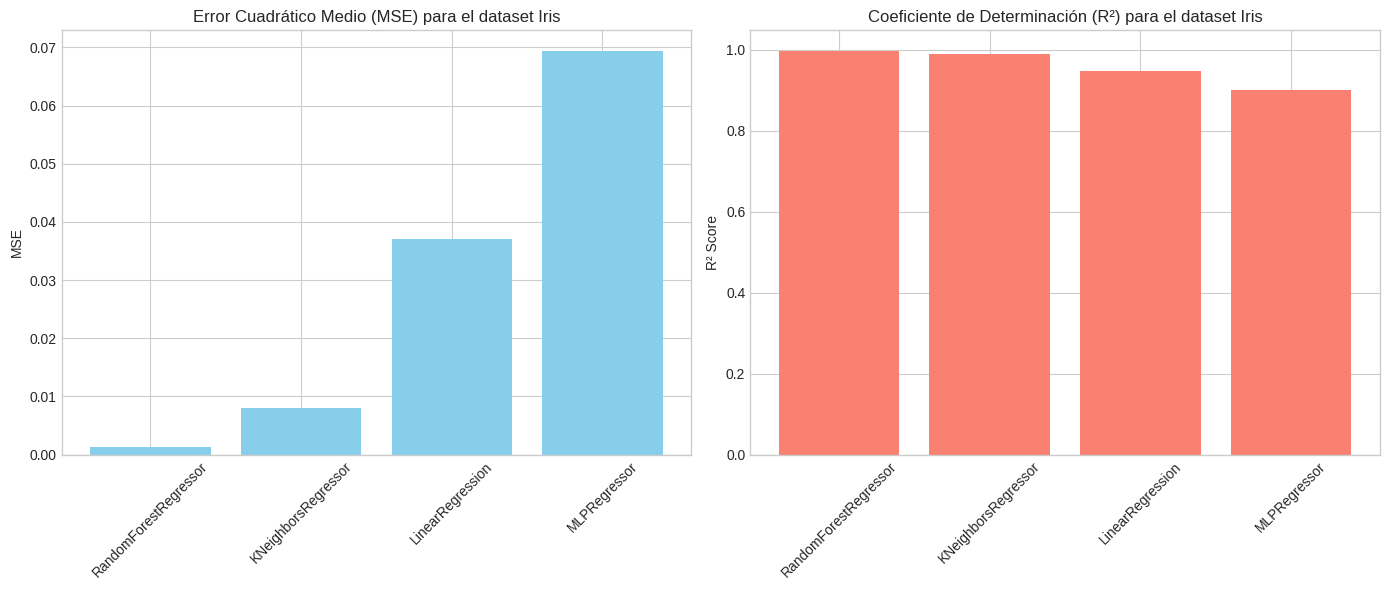

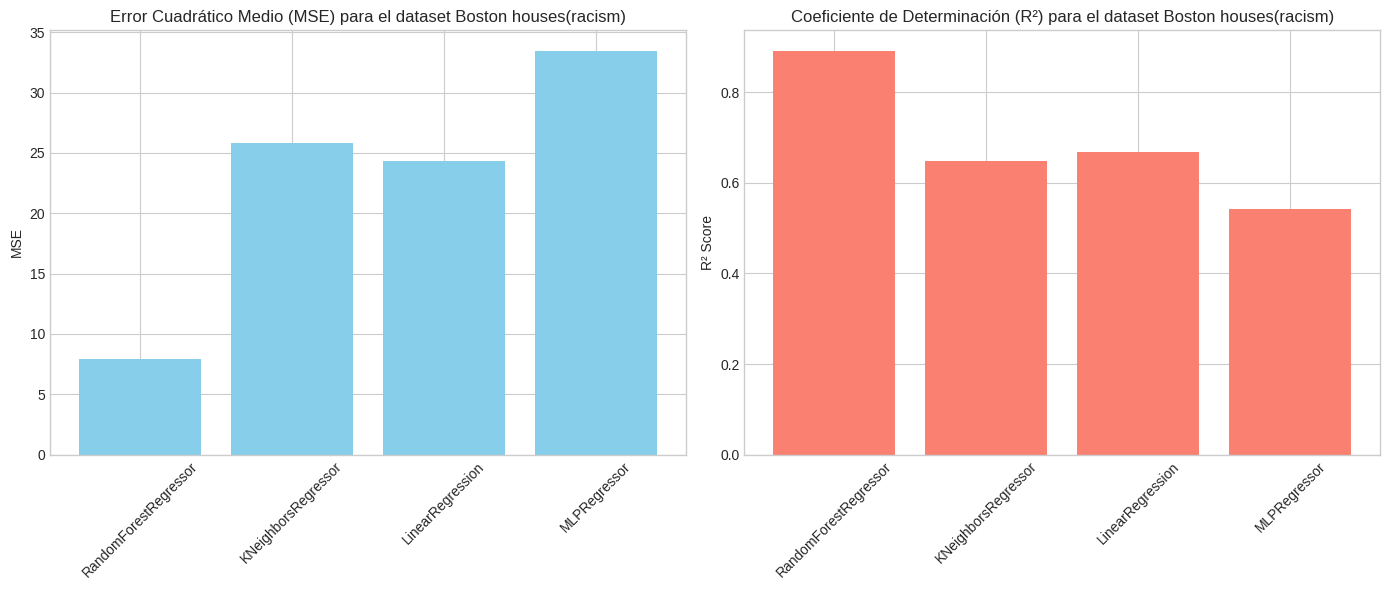

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


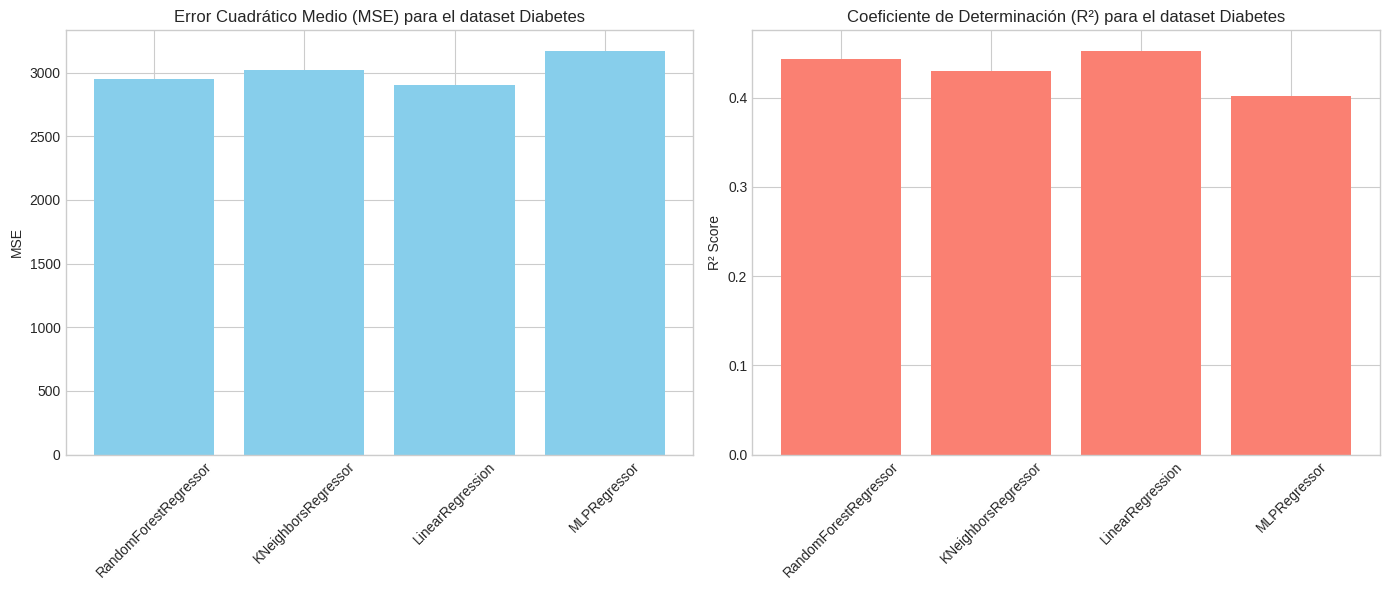

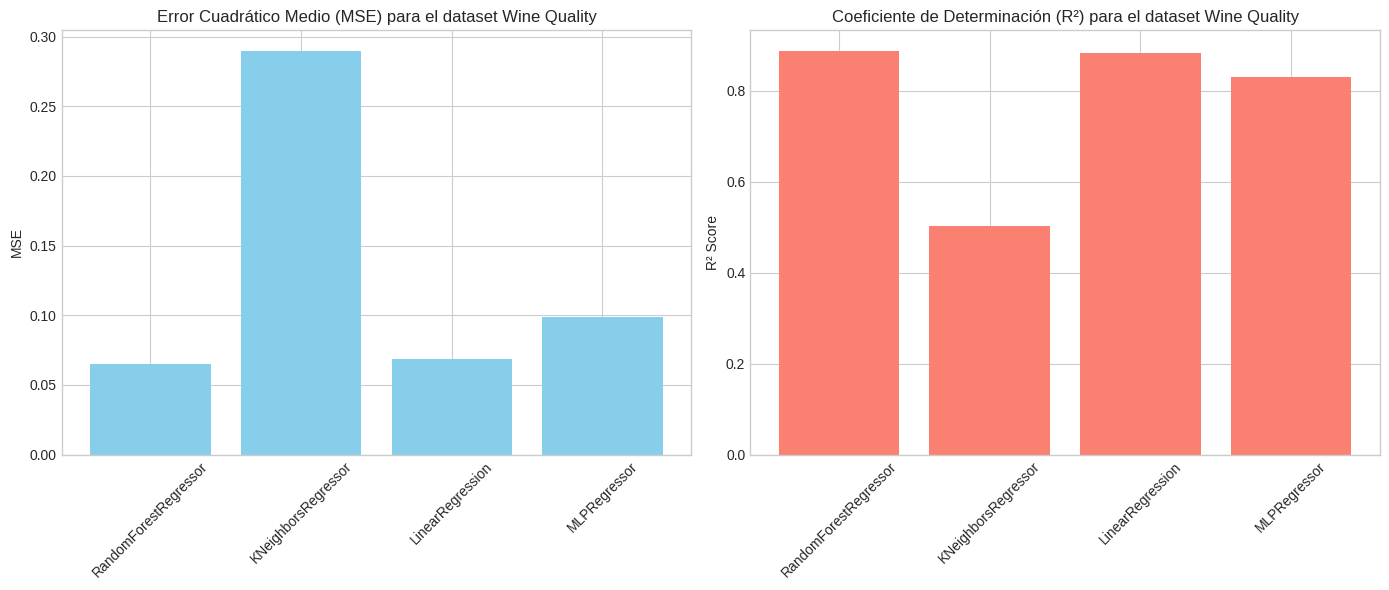

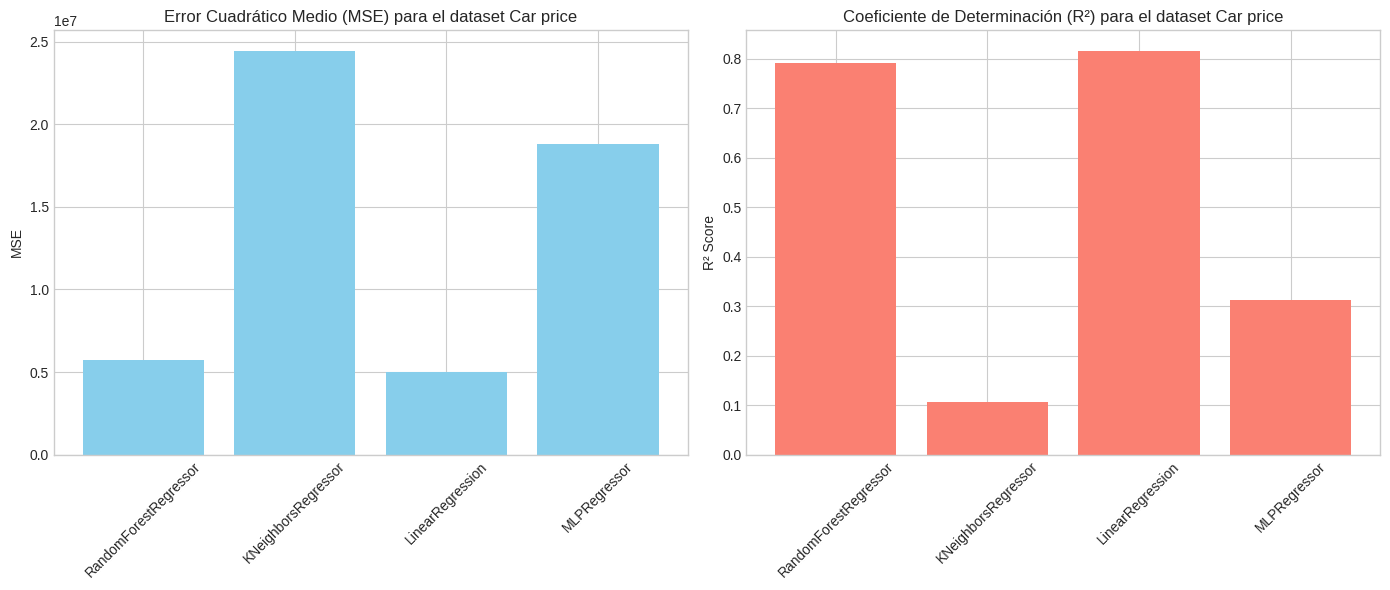

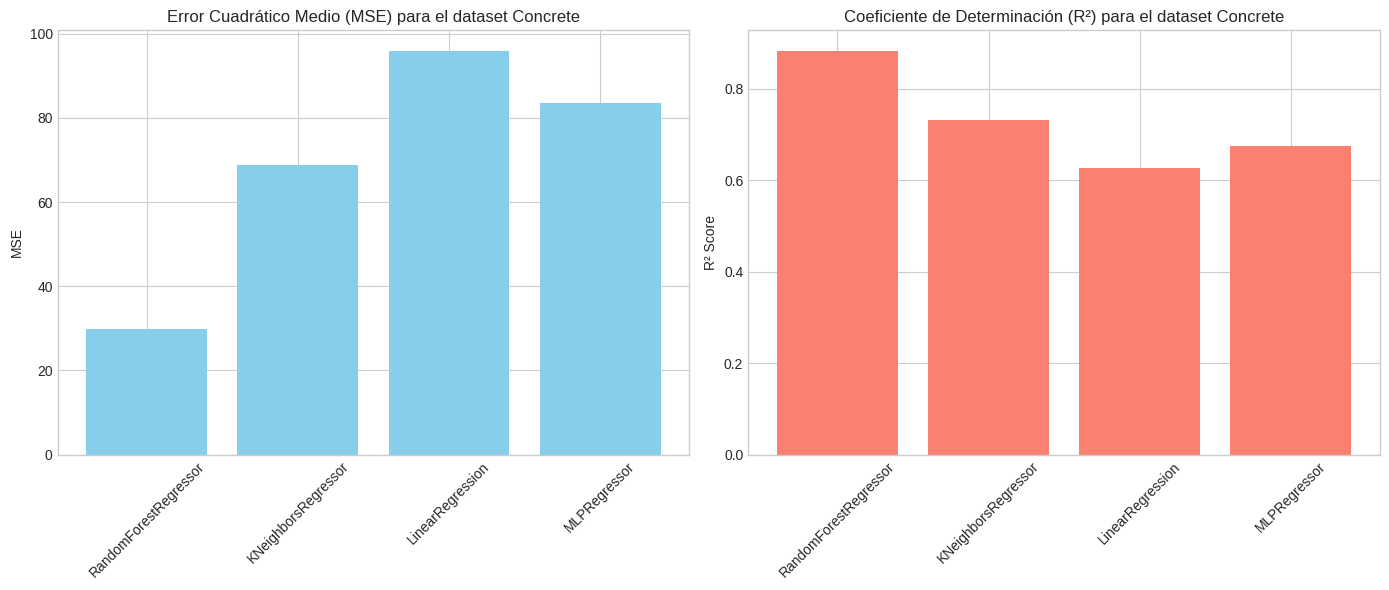

In [21]:
if __name__ == "__main__":

  modelos_supervisados(X_train_iris , X_test_iris,y_train_iris,y_test_iris,"Iris")
  modelos_supervisados(X_train_boston , X_test_boston,y_train_boston,y_test_boston,"Boston houses(racism)")
  modelos_supervisados(X_train_diabetes , X_test_diabetes,y_train_diabetes,y_test_diabetes,"Diabetes")
  modelos_supervisados(X_train_wine , X_test_wine,y_train_wine,y_test_wine,"Wine Quality")
  modelos_supervisados(X_train_car , X_test_car,y_train_car,y_test_car,"Car price")
  modelos_supervisados(X_train_concrete , X_test_concrete,y_train_concrete,y_test_concrete,"Concrete")